In [1]:
import pandas as pd

In [11]:
dataset=pd.read_csv("insurance_pre.csv")

In [12]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False
1334,18,31.920,0,2205.98080,False,False
1335,18,36.850,0,1629.83350,False,False
1336,21,25.800,0,2007.94500,False,False


In [13]:
dataset=dataset.astype(int)
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [14]:
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]

In [15]:
dependent=dataset[['charges']]

In [16]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test=train_test_split(independent, dependent, test_size=0.30, random_state=0)

In [76]:
from sklearn.tree import DecisionTreeRegressor
regressor= DecisionTreeRegressor(criterion='poisson',max_features='sqrt', splitter='best')
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='poisson', max_features='sqrt')

In [77]:
y_pred=regressor.predict(x_test)

In [78]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test, y_pred)
r_score

0.7261291634452617

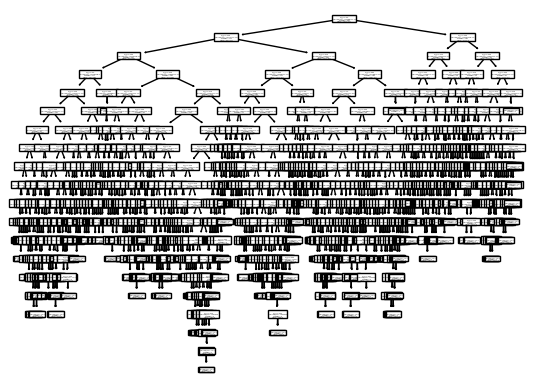

In [28]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()